In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline

In [156]:
df = pd.read_csv("/content/TestTema.csv", sep=';')

In [158]:
print(df.head())

                    id                                         tweet_text  \
0  1023730007871500288  Hj veio chocado dizendo q viu q o Jair ia libe...   
1  1023731687405117440  @raphaelsmuniz Nenhum nem outro :) Mandato Col...   
2  1023768078520397824  Ela é Campeã, e isso vai ficar pra SEMPRE! Pq ...   
3  1023768585662095361  @karevshennig Somos quase atletas dessa modali...   
4  1023772664828252160  Kkkkk Sapatão raiz é assim: Eleitora confesso ...   

                       tweet_date  sentiment    query_used  
0  Mon Jul 30 00:40:28 +0000 2018          1  bolsonaro :)  
1  Mon Jul 30 00:47:08 +0000 2018          1       PSOL :)  
2  Mon Jul 30 03:11:45 +0000 2018          1      #orgulho  
3  Mon Jul 30 03:13:46 +0000 2018          1      #orgulho  
4  Mon Jul 30 03:29:58 +0000 2018          1  bolsonaro :)  


In [159]:
# 3. Preprocessar os dados
# Verificar se as colunas esperadas estão presentes
if 'tweet_text' not in df.columns or 'sentiment' not in df.columns:
    raise ValueError("O DataFrame deve conter as colunas 'tweet_text' e 'sentiment'.")

In [160]:
# 4. Dividir os dados em conjuntos de treinamento e teste
X = df['tweet_text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [161]:
# 5. Criar e treinar o modelo
pipeline = make_pipeline(CountVectorizer(), MultinomialNB())
pipeline.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [162]:
# 6. Fazer previsões e avaliar o modelo
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [163]:
# Exibir resultados
print("\nAcurácia do Modelo:", accuracy)
print("\nRelatório de Classificação:\n", report)


Acurácia do Modelo: 0.776

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.72      0.90      0.80       500
           1       0.87      0.65      0.74       500

    accuracy                           0.78      1000
   macro avg       0.79      0.78      0.77      1000
weighted avg       0.79      0.78      0.77      1000



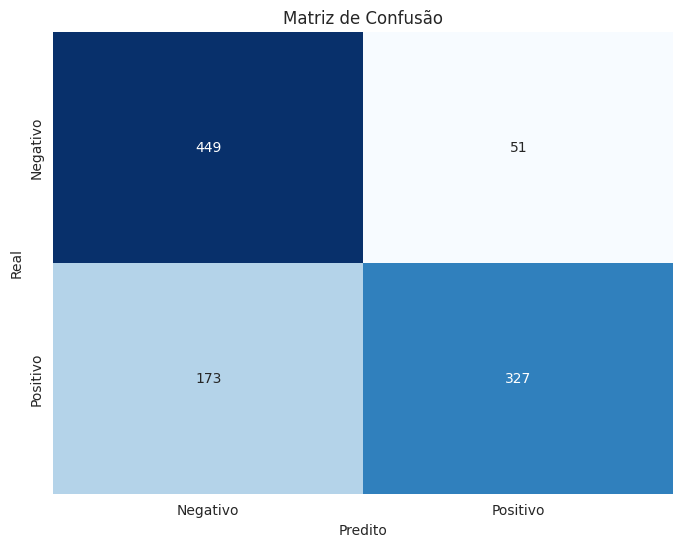

In [164]:
# 7. Visualizar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

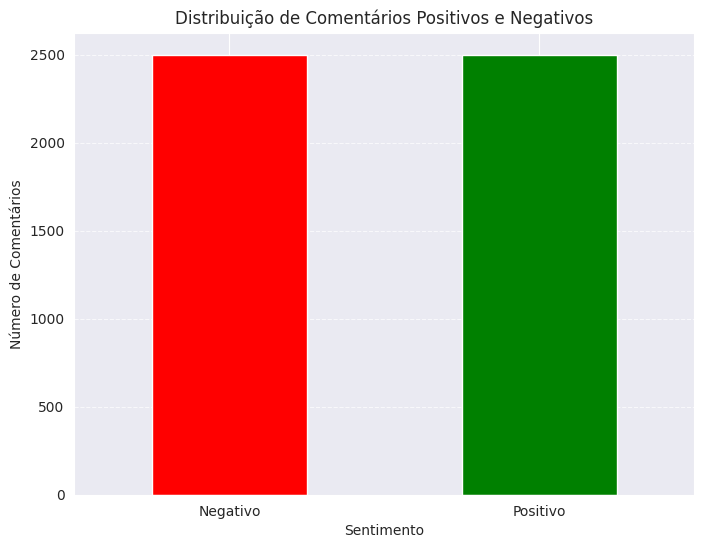

In [165]:
# 8. Visualizar a distribuição dos sentimentos
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Sentimento')
plt.ylabel('Número de Comentários')
plt.title('Distribuição de Comentários Positivos e Negativos')
plt.xticks(ticks=[0, 1], labels=['Negativo', 'Positivo'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()